In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import os

import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
os.getcwd()

'/content'

In [0]:
data=pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/DemographicData.csv", engine="python")

1) data의 첫 10줄 불러오기

In [0]:
data.head(10)

,year,country,country_code,Birth_rate,Internet_users,Income_Group,dev_index
0,2008.0,Eritrea,ERI,34.8,0.9,Low income,0.819580
1,2008.0,Timor-Leste,TLS,35.755,1.1,Lower middle income,0.774004
2,2008.0,Burundi,BDI,44.151,1.3,Low income,0.766151
3,2008.0,Somalia,SOM,43.891,1.5,Low income,0.822580
4,2008.0,Guinea,GIN,37.337,1.6,Low income,0.836394
5,2008.0,Myanmar,MMR,18.119,1.6,Lower middle income,0.818104
6,2008.0,Niger,NER,49.661,1.7,Low income,0.769059
7,2008.0,Sierra Leone,SLE,36.729,1.7,Low income,NaN
8,2008.0,Ethiopia,ETH,32.925,1.9,Low income,0.802674
9,2009.0,Ethiopia,ETH,32.925,1.9,Low income,0.902674


2) 어떤 변수들이 있는지, 각 변수별로 몇 개의 표본수가 있는지 확인하고, 
숫자형, 문자형이 알맞게 불러와졌는지 확인

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585 entries, 0 to 584
Data columns (total 7 columns):
year              583 non-null float64
country           585 non-null object
country_code      583 non-null object
Birth_rate        585 non-null object
Internet_users    584 non-null float64
Income_Group      578 non-null object
dev_index         581 non-null float64
dtypes: float64(3), object(4)
memory usage: 32.1+ KB


In [0]:
data.isnull().sum()

year              2
country           0
country_code      2
Birth_rate        0
Internet_users    1
Income_Group      7
dev_index         4
dtype: int64


*   총 7개의 변수로 이루어져 있음 
1.  숫자형 : year, Internet_users, dev_index
2.  문자형 : country, country_code, Birth_rate, Income_Group
*   이 중 birth_rate은 문자형이 아니라 숫자형(float)이 되어야 함
*   country, Birth_rate 제외하고 약간의 결측치 존재

In [0]:
data.rename(str.lower, inplace = True, axis = 1) #작업상의 편의를 위해 변수명 모두 소문자로 변경 

In [0]:
data = data.astype({'birth_rate':np.float}) #'Na'가 np.nan으로 인식되지 않아서 숫자형으로 변환 불가 

ValueError: ignored

In [0]:
data = data.replace('Na', np.nan)

In [0]:
data = data.astype({'birth_rate':np.float})

In [0]:
data.info() #birth_rate가 숫자형으로 잘 바뀌었음을 확인 가능

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585 entries, 0 to 584
Data columns (total 7 columns):
year              583 non-null float64
country           585 non-null object
country_code      583 non-null object
birth_rate        581 non-null float64
internet_users    584 non-null float64
income_group      578 non-null object
dev_index         581 non-null float64
dtypes: float64(4), object(3)
memory usage: 32.1+ KB


3) data상에서 결측치가 있는지 확인하고, 결측치를 포함하여 분석에서 이용할 수 없는 정보는 삭제

In [0]:
data.describe(include='all')

,year,country,country_code,birth_rate,internet_users,income_group,dev_index
count,583.000000,585,583,581.000000,584.000000,578,581.000000
unique,NaN,195,195,NaN,NaN,5,NaN
top,NaN,Burkina Faso,LCA,NaN,NaN,High income,NaN
freq,NaN,3,3,NaN,NaN,201,NaN
mean,2008.998285,NaN,NaN,21.889296,47.107424,NaN,1.616423
std,0.817546,NaN,NaN,13.474637,29.694105,NaN,11.796705
min,2008.000000,NaN,NaN,-8.778000,0.900000,NaN,-198.358825
25%,2008.000000,NaN,NaN,11.616000,19.650000,NaN,1.471071
50%,2009.000000,NaN,NaN,20.419000,45.800000,NaN,2.240740
75%,2010.000000,NaN,NaN,30.578000,71.850000,NaN,3.019890


In [0]:
sorted(data['country'].unique())

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt, Arab Rep.',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'French Polynesia',
 'Gabon',
 'Gambia, The',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Greenland',
 'Grenada',
 'Guam',
 'Guat

country와 country_code가 담고 있는 정보가 겹치고, country의 결측치가 비교적 적어보이므로 country_code column을 삭제함

In [0]:
data.drop('country_code', axis=1, inplace=True)

In [0]:
data = data.dropna()
data.reset_index(drop=True, inplace=True)

In [0]:
data.isnull().sum()

year              0
country           0
birth_rate        0
internet_users    0
income_group      0
dev_index         0
dtype: int64

In [0]:
data = data.astype({'year' : np.int}) #year에 소수점 붙어있는 게 거슬리니까 겸사겸사 data type integer로 바꿔줌

4) data에서 변수별 특이값을 찾고, 제거
(Hint: birth rate는 항상 양수여야 하고, Internet_user비율은 0~100사이어야 한다.)

In [0]:
data.groupby(data['year'])['country'].count()

year
2008    188
2009    190
2010    191
Name: country, dtype: int64

In [0]:
data.groupby(data['country'])['year'].count().reset_index(name='count').sort_values(['count'], ascending=True).head(10)

,country,count
0,Afghanistan,2
61,French Polynesia,2
152,Sierra Leone,2
46,Cyprus,2
38,Colombia,2
76,Honduras,2
170,Tajikistan,2
172,Thailand,2
23,Botswana,2
117,Moldova,2


모든 나라가 2008-2010 연도별 데이터를 가지고 있는지 보려고 했는데 별로 의미는 없는 것 같음

{'boxes': [<matplotlib.lines.Line2D at 0x7f266368c390>],
 'caps': [<matplotlib.lines.Line2D at 0x7f266368e588>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2663690cf8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f2663690320>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f266368cd68>,
  <matplotlib.lines.Line2D at 0x7f266368ed68>]}

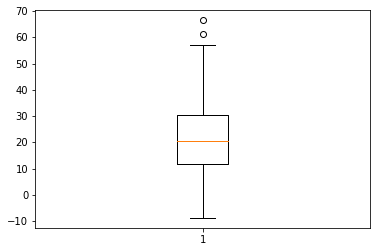

In [0]:
plt.boxplot(data['birth_rate']) #음수값이 있네?

In [0]:
data[data['birth_rate']<=0]

,year,country,birth_rate,internet_users,income_group,dev_index
204,2010,Algeria,-5.262,30.5000,Upper middle income,1.923682
251,2009,Mauritius,-0.100,40.0000,Upper middle income,2.100165
260,2010,Tonga,-0.591,41.0000,Upper middle income,2.230975
327,2010,Georgia,-4.668,52.3000,Lower middle income,2.576702
360,2009,Italy,-0.500,60.4593,High income,2.764604
371,2010,Portugal,-1.100,62.0956,High income,2.864683
396,2010,"Macedonia, FYR",-8.778,66.2400,High income,3.001684
405,2010,Seychelles,-2.400,67.4000,High income,3.025960
430,2009,Croatia,-5.600,72.7476,High income,3.091668
447,2009,Latvia,-1.800,75.2344,High income,3.160002


In [0]:
data.drop(data[data.birth_rate<=0].index, inplace=True)

{'boxes': [<matplotlib.lines.Line2D at 0x7f2663080e80>],
 'caps': [<matplotlib.lines.Line2D at 0x7f2663080f98>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2663083c50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f2663083278>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2663080898>,
  <matplotlib.lines.Line2D at 0x7f2663080160>]}

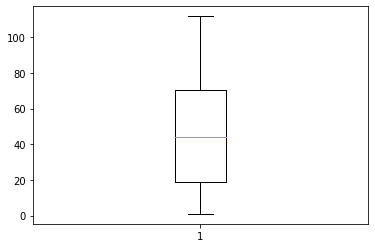

In [0]:
plt.boxplot(data['internet_users']) #100보다 큰 값이 있네?

In [0]:
data[data['internet_users']>100]

,year,country,birth_rate,internet_users,income_group,dev_index
552,2009,Bermuda,18.4,101.3000,High income,3.908640
553,2010,Finland,4.7,101.5144,High income,4.037677
555,2009,Sweden,3.8,101.7836,High income,3.947238
556,2009,Norway,1.6,102.0534,High income,3.958962
557,2010,United States,7.5,102.2000,High income,4.053625
558,2010,Canada,23.9,102.8000,High income,4.094565
559,2009,Netherlands,20.2,102.9564,High income,3.955362
560,2009,Iceland,23.4,103.5468,High income,4.017794
561,2010,Japan,3.2,104.7100,High income,4.136020
562,2010,Switzerland,19.2,105.3400,High income,4.178520


In [0]:
data.drop(data[data.internet_users>100].index, inplace=True)

In [0]:
data['income_group'].value_counts()

High income            166
Lower middle income    145
Upper middle income    135
Low income              84
Name: income_group, dtype: int64

{'boxes': [<matplotlib.lines.Line2D at 0x7f266309ab00>],
 'caps': [<matplotlib.lines.Line2D at 0x7f2662b6e4e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2662b6eeb8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f2662b6eb70>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f266309ae10>,
  <matplotlib.lines.Line2D at 0x7f2662b6e198>]}

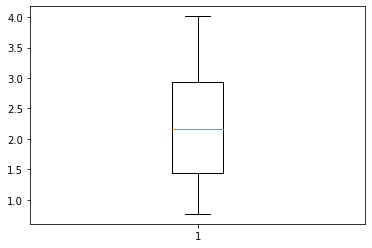

In [0]:
plt.boxplot(data['dev_index'])

In [0]:
data['dev_index'].describe() #대충 0-5 사이의 값임을 알 수 있음

count    530.000000
mean       2.211745
std        0.868224
min        0.766151
25%        1.434278
50%        2.157288
75%        2.941624
max        4.016370
Name: dev_index, dtype: float64

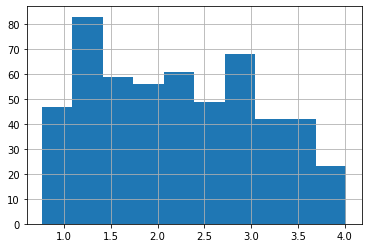

In [0]:
data['dev_index'].hist()

5) 클리닝이 완료된 data를 이용하여 각 연도별 Income_group으로 표본 분포가 어떻게 되어있는지를 bar-graph로 파악하고,
연도 및 income_group별 Birth rate와 internet users의 평균을 살펴보기

In [0]:
grouped = pd.crosstab(data.year, data.income_group)
grouped

income_group,High income,Low income,Lower middle income,Upper middle income
year,,,,
2008,66,27,49,46
2009,50,28,51,44
2010,50,29,45,45


Text(0, 0.5, 'counts')

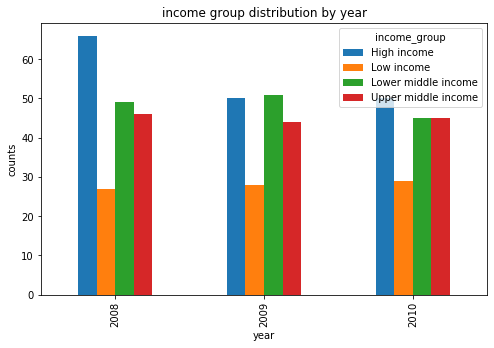

In [0]:
grouped.plot(kind='bar', figsize=(8,5))
plt.title("income group distribution by year")
plt.xlabel("year")
plt.ylabel("counts")

In [0]:
mean_birth_by_year = data.groupby('year').birth_rate.mean()
mean_internet_by_year = data.groupby('year').internet_users.mean()
mean_birth_by_income = data.groupby('income_group').birth_rate.mean()
mean_internet_by_income = data.groupby('income_group').internet_users.mean()
print(mean_birth_by_year, mean_internet_by_year, mean_birth_by_income, mean_internet_by_income)

year
2008    21.476250
2009    22.908439
2010    25.341769
Name: birth_rate, dtype: float64 year
2008    42.514744
2009    43.207244
2010    47.340049
Name: internet_users, dtype: float64 income_group
High income            14.869657
Low income             37.607679
Lower middle income    27.495559
Upper middle income    19.771778
Name: birth_rate, dtype: float64 income_group
High income            75.608867
Low income             11.067857
Lower middle income    26.692992
Upper middle income    45.309907
Name: internet_users, dtype: float64


6) dev_index를 종속변수로 하여 다중 회귀분석 수행. 이때, 필요시 특정 변수를 더미변수화 하여 분석에 활용

In [0]:
data.drop('country', axis=1, inplace=True) #나라명 어차피 별로 의미 없는 변수 같아서 drop함

In [0]:
y = data['dev_index']
X = data.iloc[:,:-1] #독립변수와 종속변수 분리

In [0]:
dummy_X = pd.get_dummies(X['income_group'], prefix='income_')

In [0]:
X_add_dummy = X.join(dummy_X)
X_add_dummy.drop('income_group', axis=1, inplace=True)
X_add_dummy

,year,birth_rate,internet_users,income__High income,income__Low income,income__Lower middle income,income__Upper middle income
0,2008,34.800,0.9000,0,1,0,0
1,2008,35.755,1.1000,0,0,1,0
2,2008,44.151,1.3000,0,1,0,0
3,2008,43.891,1.5000,0,1,0,0
4,2008,37.337,1.6000,0,1,0,0
...,...,...,...,...,...,...,...
547,2010,22.300,98.0000,1,0,0,0
548,2009,11.200,98.7100,1,0,0,0
549,2010,2.200,99.0000,1,0,0,0
550,2010,22.300,99.7765,1,0,0,0


In [0]:
X_add_dummy = sm.add_constant(X_add_dummy)
model = sm.OLS(y, X_add_dummy).fit()
model.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              dev_index   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.057e+05
Date:                Tue, 25 Feb 2020   Prob (F-statistic):               0.00
Time:                        04:34:55   Log-Likelihood:                 1205.3
No. Observations:                 530   AIC:                            -2397.
Df Residuals:                     523   BIC:                            -2367.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                        -159.1866      2.217    -71.798      0.000    -163.542    -154.831
year                            0.0995      0.001     72.099      0.000       0.097       0.102
birth_rate                     -0.0017      0.000    -15.239      0.000      -0.002      -0.002
internet_users                  0.0301   7.65e-05    393.610      0.000       0.030       0.030
income__High income           -39.8004      0.554    -71.876      0.000     -40.888     -38.713
income__Low income            -39.7918      0.555    -71.744      0.000     -40.881     -38.702
income__Lower middle income   -39.7959      0.554    -71.773      0.000     -40.885     -38.707
income__Upper middle income   -39.7984      0.554    -71.798      0.000     -40.887     -38.709
==============================================================================
Omnibus:                     2218.821   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.398
Skew:                          -0.016   Prob(JB):                     2.86e-19
Kurtosis:                       1.034   Cond. No.                     8.03e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.32e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

애초에 development index가 life expectancy, education, per capita income 등의 지표를 토대로 산출되는 것이기 때문에 변수들의 설명력이 매우 높음 (특히 income group) Adj. R-squared : 0.999